In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib


In [25]:
data = pd.read_csv('Data/Clean_Dataset.csv')
table = pd.DataFrame(data)
data.count()

Unnamed: 0          300153
airline             300153
flight              300153
source_city         300153
departure_time      300153
stops               300153
arrival_time        300153
destination_city    300153
class               300153
duration            300153
days_left           300153
price               300153
dtype: int64

In [31]:
new_data = pd.read_csv('Data/Clean_Dataset.csv', nrows=5000, index_col=0)
new_data.count()

airline             5000
flight              5000
source_city         5000
departure_time      5000
stops               5000
arrival_time        5000
destination_city    5000
class               5000
duration            5000
days_left           5000
price               5000
dtype: int64

In [14]:
#delete the first column seen in data.head()
del data['Unnamed: 0']

In [33]:
new_table = pd.DataFrame(new_data)
display(new_table.head())

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<AxesSubplot: ylabel='source_city'>

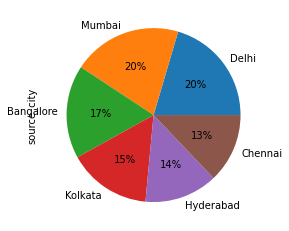

In [16]:
data['source_city'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot: ylabel='departure_time'>

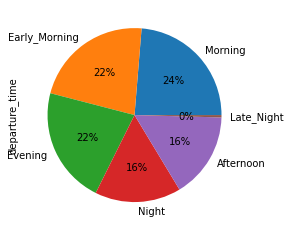

In [17]:
data['departure_time'].value_counts().plot(kind='pie', autopct = '%1.0f%%')

<AxesSubplot: ylabel='stops'>

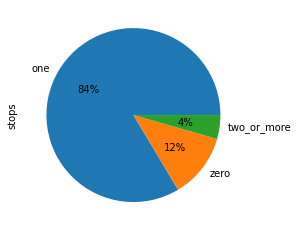

In [18]:
data['stops'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot: ylabel='class'>

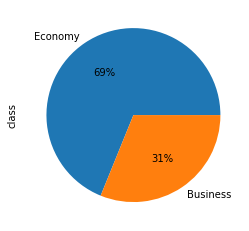

In [19]:
data['class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot: ylabel='destination_city'>

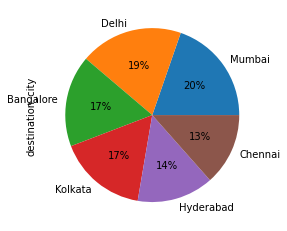

In [20]:
data['destination_city'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot: ylabel='days_left'>

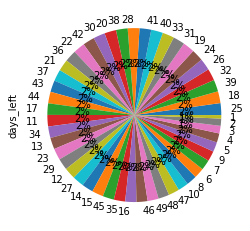

In [21]:
data['days_left'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
joblib.dump(new_data, 'Data/Clean_Dataset.pkl')

In [23]:
features = np.array(data[['source_city', 'departure_time', 'stops', 'class', 'destination_city', 'duration', 'days_left']])

model = joblib.load('Model/Model.pkl')

importance = model.features

importance_by_feature = importance.argsort()

plt.barh(data.columns[importance_by_feature], importance[importance_by_feature])

FileNotFoundError: [Errno 2] No such file or directory: 'Model/Model.pkl'